# 1. Install and Import Dependencies

In [1]:
# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
!pip3 install torch torchvision torchaudio

  Using cached torch-1.8.1-cp38-cp38-win_amd64.whl (190.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.8.1 requires torch==1.8.1, but you have torch 1.13.0 which is incompatible.



  Using cached torchvision-0.14.0-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached torch-1.13.0-cp38-cp38-win_amd64.whl (167.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.8.1
    Uninstalling torch-1.8.1:
      Successfully uninstalled torch-1.8.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.6.0+cpu
    Uninstalling torchvision-0.6.0+cpu:
      Successfully uninstalled torchvision-0.6.0+cpu


In [4]:
# import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
# conda install pytorch torchvision torchaudio cpuonly -c pytorch

In [6]:
# !pip install torch==1.5.0+cpu torchvision==0.6.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

In [7]:
import nltk
import torch

# 2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ACER/.cache\torch\hub\ultralytics_yolov5_master
C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
YOLOv5  2022-11-18 Python-3.8.5 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [10]:
# img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
# img = 'https://thumbs.dreamstime.com/z/traffic-jam-german-motorway-construction-site-153477297.jpg'
# img = 'https://st2.depositphotos.com/2020859/5489/i/950/depositphotos_54891431-stock-photo-traffic-jam-on-german-highway.jpg'

In [12]:
# results = model(img)
# results.print()

In [13]:
# %matplotlib inline 
# plt.imshow(np.squeeze(results.render()))
# plt.show()

image 1/1: 405x720 5 persons, 1 motorcycle, 1 bus
Speed: 336.3ms pre-process, 400.3ms inference, 16.9ms NMS per image at shape (1, 3, 384, 640)


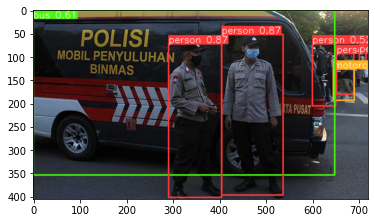

In [14]:
# img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
# img = 'https://thumbs.dreamstime.com/z/traffic-jam-german-motorway-construction-site-153477297.jpg'
# img = 'https://st2.depositphotos.com/2020859/5489/i/950/depositphotos_54891431-stock-photo-traffic-jam-on-german-highway.jpg'
# img = 'https://imgx.gridoto.com/crop/0x0:0x0/700x465/photo/gridoto/2017/12/13/96302088.jpg'
img = 'https://statik.tempo.co/data/2022/07/25/id_1127658/1127658_720.jpg'

results = model(img)
results.print()

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [34]:
# results.render()

# 4. Real Time Detections

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [35]:
import uuid   # Unique identifier
import os
import time

In [36]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [38]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [39]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.445b1107-6706-11ed-8974-fc4482a2ef62.jpg


In [40]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.48584a41-6706-11ed-b4b1-fc4482a2ef62.jpg
data\images\awake.48584a42-6706-11ed-82d6-fc4482a2ef62.jpg
data\images\awake.48584a43-6706-11ed-b2d6-fc4482a2ef62.jpg
data\images\awake.48584a44-6706-11ed-be33-fc4482a2ef62.jpg
data\images\awake.48584a45-6706-11ed-82f7-fc4482a2ef62.jpg
data\images\drowsy.48584a46-6706-11ed-86dd-fc4482a2ef62.jpg
data\images\drowsy.48584a47-6706-11ed-b3c6-fc4482a2ef62.jpg
data\images\drowsy.48584a48-6706-11ed-9cd2-fc4482a2ef62.jpg
data\images\drowsy.48584a49-6706-11ed-969c-fc4482a2ef62.jpg
data\images\drowsy.48584a4a-6706-11ed-b1ad-fc4482a2ef62.jpg


In [41]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 21.8 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 32.8 MB/s eta 0:00:00
     --------------------------------------- 50.1/50.1 MB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 78.1/78.1 kB ? eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.1
    Uninstalling lxml-4.6.1:
      Successfully uninstalled lxml-4.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", but you have pyqt5 5.15.7 which is incompatible.


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()